In [1]:
# Required modules

import re
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
# Load the data from the uploaded file

file_path = './tiktok_data.csv'
tiktok_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tiktok_data.head()

,ID,Description,Create Time,Author ID,Author Nickname,Music ID,Music Title,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
0,7169053647245020458,Bless her heart! #HuluChippendalesDance #BeThe...,1669175392,6589773046515941382,Ryan Odom,7169053724621572910,original sound,67700,62,75,469400,0.144519
1,7080281296659909934,like okay calm down stacy there's only 5% in a...,1648506452,6716555753459401734,Karol,7055883490604436229,FAMOUS PEOPLE ARE USING THIS SOUND OMG,27500,127,209,153800,0.180988
2,7099503371643637038,"Don’t be shy claw lovers, which is your go-to ...",1652981941,6713997619171197958,delish,6840186129753328389,sonido original,1215,39,39,76700,0.016858
3,7332932181079313710,Going through my #drafts and found this gem 💎 ...,1707331367,6767780616467497990,KaySquad_,7299596010534505262,original sound,34900,691,466,620400,0.058119
4,6909544692682149125,comment your fav! 🥂 #whiteclaw #alcoholicdrink...,1608753751,6712189871371387909,LOUIS LEVANTI,6746993352891189249,Monkeys Spinning Monkeys,22200,667,543,191100,0.122501


In [3]:
# A Glimpse at the data

tiktok_data.info()
tiktok_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               97 non-null     int64  
 1   Description      97 non-null     object 
 2   Create Time      97 non-null     int64  
 3   Author ID        97 non-null     int64  
 4   Author Nickname  97 non-null     object 
 5   Music ID         97 non-null     int64  
 6   Music Title      96 non-null     object 
 7   Digg Count       97 non-null     int64  
 8   Share Count      97 non-null     int64  
 9   Comment Count    97 non-null     int64  
 10  Play Count       97 non-null     int64  
 11  Engagement Rate  97 non-null     float64
dtypes: float64(1), int64(8), object(3)
memory usage: 9.2+ KB


,ID,Create Time,Author ID,Music ID,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000,97.000000,9.700000e+01,97.000000
mean,7.079321e+18,1.648283e+09,6.318938e+18,6.795471e+18,8.600235e+04,7909.525773,698.927835,9.961874e+05,0.089937
std,1.976148e+17,4.601078e+07,1.752403e+18,1.216610e+18,3.529497e+05,34686.545795,1808.429511,3.208764e+06,0.051399
min,6.761540e+18,1.574294e+09,5.257484e+06,2.431904e+17,3.600000e+01,0.000000,0.000000,7.860000e+02,0.010278
25%,6.909545e+18,1.608754e+09,6.712190e+18,6.799586e+18,1.536000e+03,46.000000,36.000000,2.260000e+04,0.042065
50%,7.080281e+18,1.648506e+09,6.766747e+18,6.943008e+18,2.220000e+04,496.000000,190.000000,2.328000e+05,0.094514
75%,7.272407e+18,1.693239e+09,6.814249e+18,7.244591e+18,5.750000e+04,2032.000000,543.000000,6.204000e+05,0.128389
max,7.386415e+18,1.719784e+09,7.276691e+18,7.369577e+18,3.100000e+06,333500.000000,11700.000000,2.070000e+07,0.235347


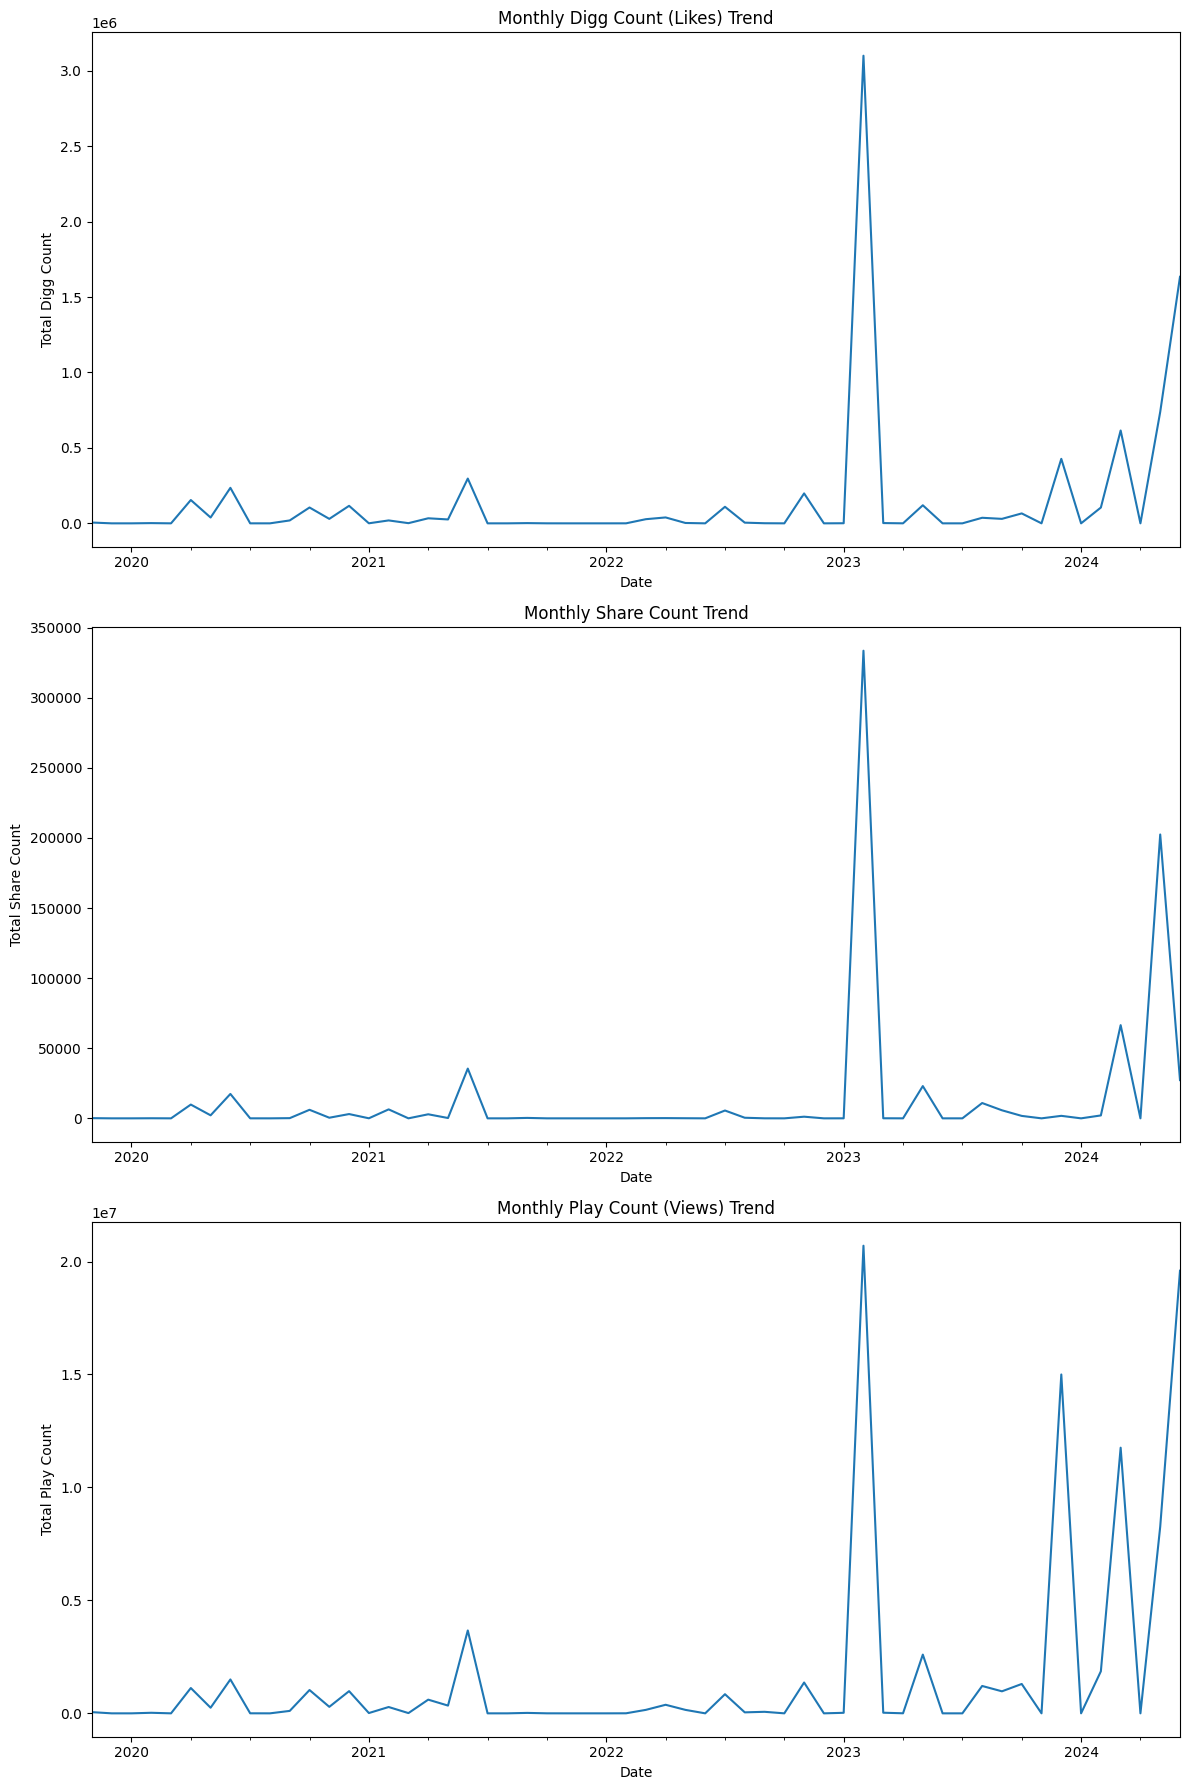

In [4]:
# Trend Visualization

# Convert 'Create Time' from Unix timestamp to datetime
tiktok_data['Create Time'] = pd.to_datetime(tiktok_data['Create Time'], unit='s')

# Set 'Create Time' as the index for easier time series plotting
tiktok_data.set_index('Create Time', inplace=True)

# Plot trends over time for each engagement metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Digg Count (Likes) Trend
tiktok_data['Digg Count'].resample('M').sum().plot(ax=axes[0])
axes[0].set_title('Monthly Digg Count (Likes) Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Digg Count')

# Share Count Trend
tiktok_data['Share Count'].resample('M').sum().plot(ax=axes[1])
axes[1].set_title('Monthly Share Count Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Share Count')

# Play Count (Views) Trend
tiktok_data['Play Count'].resample('M').sum().plot(ax=axes[2])
axes[2].set_title('Monthly Play Count (Views) Trend')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Total Play Count')

plt.tight_layout()
plt.show()

In [5]:
# Correlation matrix of important metrics

correlation_matrix = tiktok_data[['Digg Count', 'Share Count', 'Comment Count', 'Play Count', 'Engagement Rate']].corr()

<Axes: >

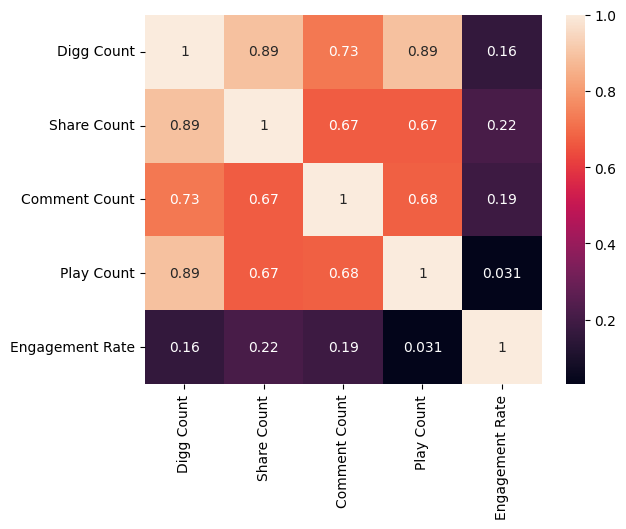

In [6]:
# Correlation heatmap

sns.heatmap(correlation_matrix, annot=True)

The correlation matrix shows the relationships between different engagement metrics:

**Strong positive correlations:**

* Digg Count with Share Count (0.891) and Play Count (0.892).
* Share Count with Play Count (0.669).
* Comment Count with Digg Count (0.725) and Play Count (0.676).

**Weak correlations:**

* Engagement Rate has weak correlations with all other metrics, the highest being with Share Count (0.215).

**Key Takeaways:**
* Digg Count is highly correlated with both Share Count and Play Count, suggesting that videos with more likes tend to be shared more and viewed more.
* Comment Count is also positively correlated with Digg Count and Play Count, indicating that popular videos receive more comments.
* Engagement Rate has a weak correlation with other metrics, indicating that higher raw counts do not necessarily translate to higher engagement rates.

In [7]:
# Identify the top 5 performing videos for each metric

top_digg_count = tiktok_data.nlargest(5, 'Digg Count')
top_share_count = tiktok_data.nlargest(5, 'Share Count')
top_comment_count = tiktok_data.nlargest(5, 'Comment Count')
top_play_count = tiktok_data.nlargest(5, 'Play Count')

In [8]:
# Top Digg Count

top_digg_count

,ID,Description,Author ID,Author Nickname,Music ID,Music Title,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
Create Time,,,,,,,,,,,
2023-02-19 18:51:52,7201941644210375941,"Málaga, Spain 🇪🇸🌴☀️🌊 Cre...",6768527081329542150,Safwan Ahmed,7146287651581872901,Me gustas tú,3100000,333500,11600,20700000,0.166430
2024-06-10 09:29:48,7378804411809729825,Lamine Yamal vision 😳 #EURO2024 #Spain,6900726384428844037,EURO2024,7259080503781148674,Sequência da Orquestra (Slowed+Reverb),1600000,25800,5711,19300000,0.084534
2023-12-07 17:53:03,7309912264486685984,I love her vibes #culture #spain #funny #guess...,7276690668617516064,taxpayer,7309912286469065504,original sound,427600,1782,3293,15000000,0.028845
2024-03-11 20:06:34,7345199689299414315,Casillas🇪🇸🧱🧤 #casillas #spain #fyp #zyxcba,7192358131682509870,.hetc,7345199785769700139,original sound,269600,2973,1032,2700000,0.101335
2020-06-25 20:12:32,6842380904388775174,This video came out one year ago today 🥺 idk w...,6705528089663063046,trevor wallace,6842380909203688198,original sound,235400,17400,733,1500000,0.169022


In [9]:
# Top Share Count

top_share_count

,ID,Description,Author ID,Author Nickname,Music ID,Music Title,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
Create Time,,,,,,,,,,,
2023-02-19 18:51:52,7201941644210375941,"Málaga, Spain 🇪🇸🌴☀️🌊 Cre...",6768527081329542150,Safwan Ahmed,7146287651581872901,Me gustas tú,3100000,333500,11600,20700000,0.166430
2024-05-11 16:18:26,7367777140970147118,COTTON CANDY TRULY #truly #cottoncandy #trulys...,6889407379974587397,Yas,7362317730454308880,MILLION DOLLAR BABY (VHS),90800,35800,1098,772600,0.165283
2024-05-11 16:18:26,7367777140970147118,COTTON CANDY TRULY #truly #cottoncandy #trulys...,6889407379974587397,Yas,7362317730454308880,MILLION DOLLAR BABY (VHS),90800,35800,1098,772600,0.165283
2024-05-11 16:18:26,7367777140970147118,COTTON CANDY TRULY #truly #cottoncandy #trulys...,6889407379974587397,Yas,7362317730454308880,MILLION DOLLAR BABY (VHS),90800,35800,1098,772600,0.165283
2024-05-11 16:18:26,7367777140970147118,COTTON CANDY TRULY #truly #cottoncandy #trulys...,6889407379974587397,Yas,7362317730454308880,MILLION DOLLAR BABY (VHS),90800,35800,1098,772600,0.165283


In [10]:
# Top Comment Count

top_comment_count

,ID,Description,Author ID,Author Nickname,Music ID,Music Title,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
Create Time,,,,,,,,,,,
2024-05-16 12:41:14,7369576569100061995,GenX has found ticktok #genx #reddawn #genxtik...,7169189867480745002,Lewis Walker,7369576633671420715,original sound,118000,16900,11700,1200000,0.122167
2023-02-19 18:51:52,7201941644210375941,"Málaga, Spain 🇪🇸🌴☀️🌊 Cre...",6768527081329542150,Safwan Ahmed,7146287651581872901,Me gustas tú,3100000,333500,11600,20700000,0.166430
2024-06-10 09:29:48,7378804411809729825,Lamine Yamal vision 😳 #EURO2024 #Spain,6900726384428844037,EURO2024,7259080503781148674,Sequência da Orquestra (Slowed+Reverb),1600000,25800,5711,19300000,0.084534
2022-04-28 22:32:11,7091786124602952965,Trying White Claw Hard Seltzer for the first t...,6757342389373158406,Dawn Farmer,6817175799632758786,"Fun, light, honobo, everyday, piano solo",39100,164,4450,379000,0.115340
2023-12-07 17:53:03,7309912264486685984,I love her vibes #culture #spain #funny #guess...,7276690668617516064,taxpayer,7309912286469065504,original sound,427600,1782,3293,15000000,0.028845


In [11]:
# Top Play Count

top_play_count

,ID,Description,Author ID,Author Nickname,Music ID,Music Title,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
Create Time,,,,,,,,,,,
2023-02-19 18:51:52,7201941644210375941,"Málaga, Spain 🇪🇸🌴☀️🌊 Cre...",6768527081329542150,Safwan Ahmed,7146287651581872901,Me gustas tú,3100000,333500,11600,20700000,0.166430
2024-06-10 09:29:48,7378804411809729825,Lamine Yamal vision 😳 #EURO2024 #Spain,6900726384428844037,EURO2024,7259080503781148674,Sequência da Orquestra (Slowed+Reverb),1600000,25800,5711,19300000,0.084534
2023-12-07 17:53:03,7309912264486685984,I love her vibes #culture #spain #funny #guess...,7276690668617516064,taxpayer,7309912286469065504,original sound,427600,1782,3293,15000000,0.028845
2024-05-10 14:43:23,7367381520761359662,Beaches in Spain are wild #spain #malaga,6719477318416745477,Sam Ramsdell,7367381609646951211,original sound,166800,6539,520,3200000,0.054331
2024-03-11 20:06:34,7345199689299414315,Casillas🇪🇸🧱🧤 #casillas #spain #fyp #zyxcba,7192358131682509870,.hetc,7345199785769700139,original sound,269600,2973,1032,2700000,0.101335


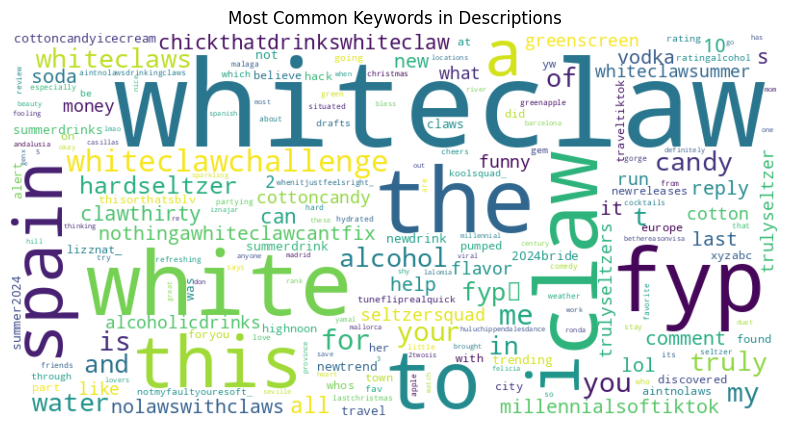

In [12]:
# Preprocess descriptions: lowercasing, removing special characters, and splitting into words
tiktok_data['Cleaned Description'] = tiktok_data['Description'].str.lower()
tiktok_data['Cleaned Description'] = tiktok_data['Cleaned Description'].apply(lambda x: re.findall(r'\b\w+\b', x))

# Flatten the list of words from all descriptions
all_words = [word for description in tiktok_data['Cleaned Description'] for word in description]

# Count the frequency of each word
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(20)

# Create a word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords in Descriptions')
plt.show()

The most common keywords in the descriptions reveal several interesting trends:

**Brand-Related Terms:** "whiteclaw", "white", "claw", and "whiteclawchallenge" are among the most frequent, indicating a popular trend around the White Claw brand and related challenges.

**Geographic Reference:** "spain" appears frequently, suggesting a significant number of videos are related to Spain.

**Engagement Tags:** "fyp" (For You Page) is a common tag used to boost video visibility.

**General Terms:** Words like "the", "to", "this", "i", "a", and "me" are common, as expected in typical descriptions.

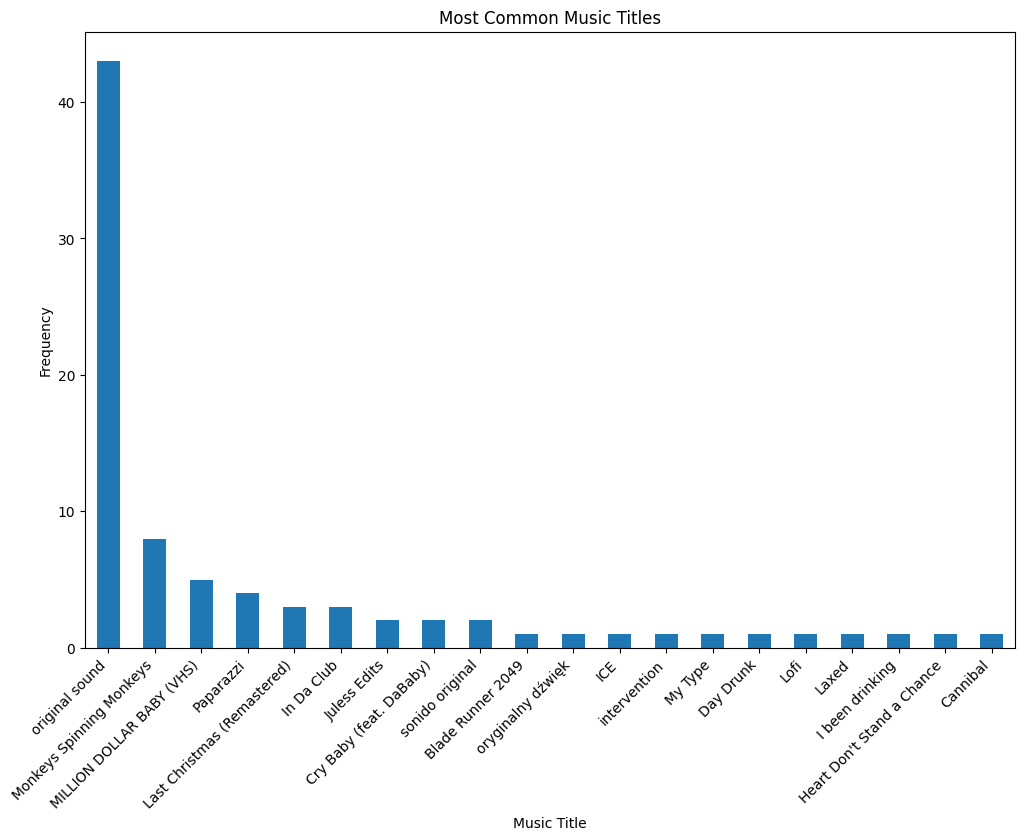

In [13]:
# Analysis on the music

music_freq = tiktok_data['Music Title'].value_counts()

# Display the most common music titles
common_music = music_freq.head(20)

# Create a bar plot for the most common music titles
plt.figure(figsize=(12, 8))
common_music.plot(kind='bar')
plt.title('Most Common Music Titles')
plt.xlabel('Music Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

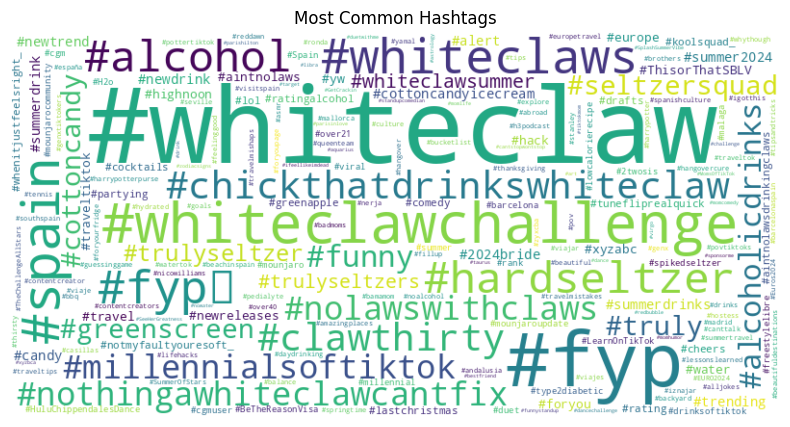

In [14]:
# Extract hashtags from descriptions
tiktok_data['Hashtags'] = tiktok_data['Description'].apply(lambda x: re.findall(r'#\w+', x))

# Flatten the list of hashtags
all_hashtags = [hashtag for hashtags in tiktok_data['Hashtags'] for hashtag in hashtags]

# Count the frequency of each hashtag
hashtag_freq = Counter(all_hashtags)

# Display the most common hashtags
common_hashtags = hashtag_freq.most_common(20)

# Create a word cloud visualization for hashtags
hashtag_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Hashtags')
plt.show()

In [15]:
# List of common locations/keywords to search for
location_keywords = ['spain', 'malaga', 'europe', 'america', 'usa', 'new york', 'california', 'france', 'italy', 'germany']

# Function to extract location mentions
def extract_locations(description, keywords):
    found_locations = [keyword for keyword in keywords if keyword in description.lower()]
    return found_locations

# Apply the function to extract location mentions
tiktok_data['Locations'] = tiktok_data['Description'].apply(lambda x: extract_locations(x, location_keywords))

# Flatten the list of locations
all_locations = [location for locations in tiktok_data['Locations'] for location in locations]

# Count the frequency of each location
location_freq = Counter(all_locations)

# Display the most common locations
common_locations = location_freq.most_common()

<Figure size 1200x800 with 0 Axes>

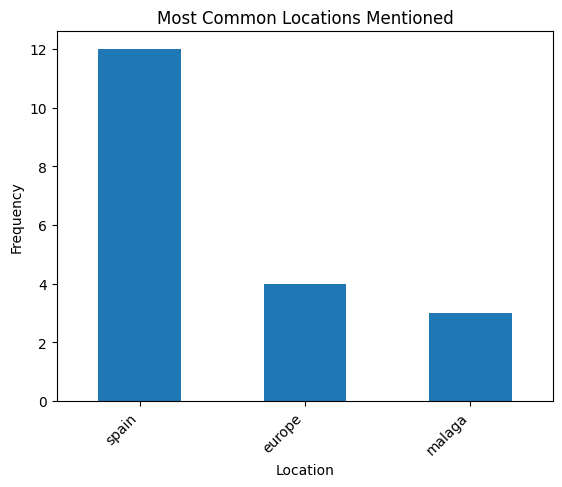

In [16]:
# Create a bar plot for the most common locations

plt.figure(figsize=(12, 8))
location_freq_df = pd.DataFrame(common_locations, columns=['Location', 'Frequency']).head(10)
location_freq_df.plot(kind='bar', x='Location', y='Frequency', legend=False)
plt.title('Most Common Locations Mentioned')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()